<a href="https://colab.research.google.com/github/mwilliams351/Project_1/blob/main/Project_1_Google_play_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
from datetime import datetime
import statistics
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
def convert(x):
    SUFFIXES = {'k': 1000, 'M': 1e+6}
    str_x = str(x)
    if str_x == "Varies with device":
        return 0.0
    stripped_x = str_x.replace(',', '').replace('+', '').strip()
    suffix = x[-1]
    if suffix in SUFFIXES:
        value_chars = stripped_x[:-1]
        mantissa = float(value_chars)
        exponent = SUFFIXES[suffix]
        value = mantissa * exponent
    else:
        value = float(stripped_x)
    return value

def word_finder(string, df):
  output_list = []
  test_word = str(string) + " "
  for index, row in df.iterrows():
      formatted_string = row['App'].strip().lower()
      comparison_string = formatted_string + "  "
      if test_word in comparison_string:
          output_list.append(row["App"])
  return output_list

In [ ]:
# import  data
drive.mount('/content/drive', force_remount=True)
path= "/content/drive/My Drive/Google_Data/googleplaystore.csv"
raw_data = pd.read_csv(path)
#cleaning data
new_df = raw_data.set_index("App")
new_df.drop(labels = "Life Made WI-Fi Touchscreen Photo Frame", axis = 0, inplace = True)
new_df  = new_df.fillna(0)
new_df["Installs"] = new_df["Installs"].apply(convert)
new_df["Size"] = new_df["Size"].apply(convert)
new_df["Price"] = new_df["Price"].str.replace("$" , "").astype(float)
clean_df = new_df.reset_index()
new_dates=[]
clean_df["Last Updated"]=clean_df["Last Updated"].astype(str)
for index, rows in clean_df.iterrows():
  date_formats=datetime.strptime(rows["Last Updated"],"%B %d, %Y")
  new_dates.append(date_formats)
clean_df["Last Updated"]=new_dates
clean_df = clean_df.drop_duplicates(subset = ['App'], keep = 'first')
clean_df.head()

Mounted at /content/drive


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
clean_df.describe()

,Rating,Size,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000
mean,3.541143,1.780444e+07,7.777507e+06,1.099299
std,1.575733,2.149524e+07,5.375828e+07,16.852152
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.600000,2.900000e+06,1.000000e+03,0.000000
50%,4.200000,9.100000e+06,1.000000e+05,0.000000
75%,4.500000,2.500000e+07,1.000000e+06,0.000000
max,5.000000,1.000000e+08,1.000000e+09,400.000000


# New Section

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

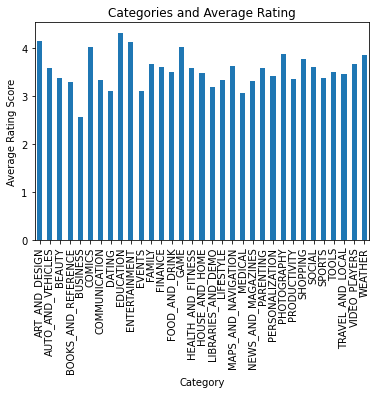

In [ ]:
#Rating vs category
ratings = clean_df.groupby("Category").mean()["Rating"]
ratings
plt.title("Categories and Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating Score")
rating_plot = ratings.plot(kind = "bar")
plt.savefig('Categories_Ratings.png')
files.download('Categories_Ratings.png')

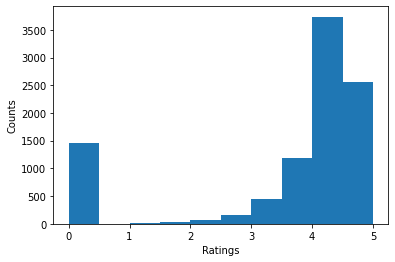

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
#histogram of ratings
plt.hist(clean_df.Rating)
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()
plt.savefig('Ratings_Histogram.png')
files.download('Ratings_Histogram.png')

In [ ]:
Business = clean_df.loc[clean_df["Category"] == "BUSINESS"]
Business.head()
business_count = Business.count()["App"]
business_rating = Business.mean()["Rating"]
business_price = Business.mean()["Price"]
business_installs = Business.mean()["Installs"]
business_size = Business.mean()["Size"]

In [ ]:
Education = clean_df.loc[clean_df["Category"] == "EDUCATION"]
Education.head()
Education_count = Education.count()["App"]
Education_rating = Education.mean()["Rating"]
Education_price = Education.mean()["Price"]
Education_installs = Education.mean()["Installs"]
Education_size = Education.mean()["Size"]

In [ ]:
Games = clean_df.loc[clean_df["Category"] == "GAME"]
Games.head()
Games_count = Games.count()["App"]
Games_rating = Games.mean()["Rating"]
Games_price = Games.mean()["Price"]
Games_installs = Games.mean()["Installs"]
Games_size = Games.mean()["Size"]

In [ ]:
Productivity = clean_df.loc[clean_df["Category"] == "PRODUCTIVITY"]
Productivity.head()
Productivity_count = Productivity.count()["App"]
Productivity_rating = Productivity.mean()["Rating"]
Productivity_price = Productivity.mean()["Price"]
Productivity_installs = Productivity.mean()["Installs"]
Productivity_size = Productivity.mean()["Size"]

In [ ]:
Lifestyle = clean_df.loc[clean_df["Category"] == "LIFESTYLE"]
Lifestyle.head()
Lifestyle_count = Lifestyle.count()["App"]
Lifestyle_rating = Lifestyle.mean()["Rating"]
Lifestyle_price = Lifestyle.mean()["Price"]
Lifestyle_installs = Lifestyle.mean()["Installs"]
Lifestyle_size = Lifestyle.mean()["Size"]

In [ ]:
summary_df = pd.DataFrame ({"Category": ["Business", "Education", "Games", "Productivity", "Lifestyle"], 
                            "Count": [business_count,Education_count,Games_count,Productivity_count,Lifestyle_count], 
                            " Ratings Averages": [business_rating, Education_rating, Games_rating,Productivity_rating,Lifestyle_rating],
                            "Average Price": [business_price,Education_price,Games_price,Productivity_price,Lifestyle_price], 
                           "Average Installs":[business_installs,Education_installs,Games_installs,Productivity_installs,Lifestyle_installs],
                           "Average Size": [business_size, Education_size,Games_size,Productivity_size,Lifestyle_size ]})
summary_df

,Category,Count,Ratings Averages,Average Price,Average Installs,Average Size
0,Business,420,2.566429,0.417357,1.659916e+06,1.241444e+07
1,Education,119,4.327731,0.150924,2.965983e+06,1.425279e+07
2,Games,959,4.039208,0.296465,1.447229e+07,3.811215e+07
3,Productivity,374,3.366845,0.670936,1.548955e+07,9.603393e+06
4,Lifestyle,369,3.339024,6.398022,1.365375e+06,1.343686e+07


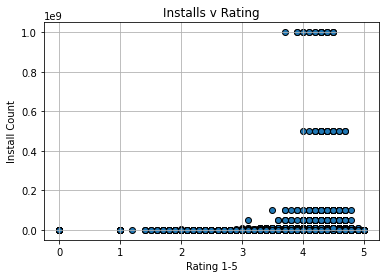

In [ ]:
#Rating vs install count
plt.scatter(clean_df["Rating"], clean_df["Installs"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("Installs v Rating")
plt.ylabel("Install Count")
plt.xlabel("Rating 1-5")
plt.grid(True)
# Show plot
plt.savefig('InstallvRating.png')
files.download('InstallvRating.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

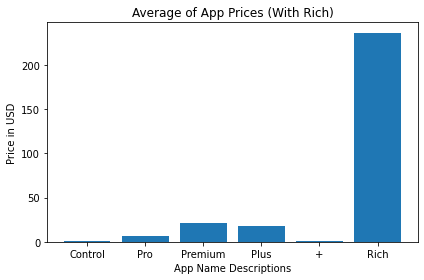

In [ ]:
#Does having “rich” “pro” or “plus” make an app more expensive?
avg_price = clean_df["Price"].mean()
pro_prices = []
pro_list = word_finder("pro", clean_df)
for app in pro_list:
    indexed_df = clean_df.set_index("App")
    specific_word_prices = indexed_df.loc[app, "Price"]
    pro_prices.append(specific_word_prices)
avg_pro_prices = statistics.mean(pro_prices)
premium_prices = []
premium_list = word_finder("premium", clean_df)
for app in premium_list:
    indexed_df = clean_df.set_index("App")
    specific_word_prices = indexed_df.loc[app, "Price"]
    premium_prices.append(specific_word_prices)
avg_premium_prices = statistics.mean(premium_prices)
plus_prices = []
plus_list = word_finder("plus", clean_df)
for app in plus_list:
    indexed_df = clean_df.set_index("App")
    specific_word_prices = indexed_df.loc[app, "Price"]
    plus_prices.append(specific_word_prices)
avg_plus_prices = statistics.mean(plus_prices)
char_plus_prices = []
char_plus_list = word_finder("+", clean_df)
for app in char_plus_list:
    indexed_df = clean_df.set_index("App")
    specific_word_prices = indexed_df.loc[app, "Price"]
    char_plus_prices.append(specific_word_prices)
avg_char_plus_prices = statistics.mean(char_plus_prices)
rich_prices = []
rich_list = word_finder("rich", clean_df)
for app in rich_list:
    indexed_df = clean_df.set_index("App")
    specific_word_prices = indexed_df.loc[app, "Price"]
    rich_prices.append(specific_word_prices)
rich_prices = statistics.mean(rich_prices)

titles_list = ['Control', 'Pro', 'Premium', 'Plus', '+', 'Rich']
prices_list = [avg_price, avg_pro_prices, avg_premium_prices, avg_plus_prices, avg_char_plus_prices, rich_prices]
titles_without_rich = ['Control', 'Pro', 'Premium', 'Plus', '+']
prices_without_rich = [avg_price, avg_pro_prices, avg_premium_prices, avg_plus_prices, avg_char_plus_prices]

plt.bar(titles_list,prices_list)
plt.title('Average of App Prices (With Rich)')
plt.xlabel('App Name Descriptions')
plt.ylabel('Price in USD')
plt.tight_layout()
plt.savefig('Average_of_App_Prices_With_Rich.png')
files.download('Average_of_App_Prices_With_Rich.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

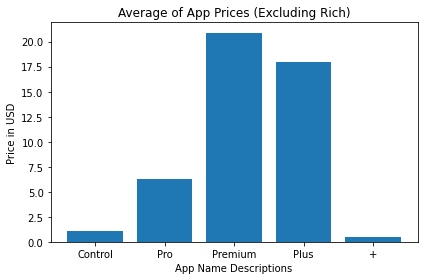

In [ ]:
plt.bar(titles_without_rich,prices_without_rich)
plt.title('Average of App Prices (Excluding Rich)')
plt.xlabel('App Name Descriptions')
plt.ylabel('Price in USD')
plt.tight_layout()
plt.savefig('Average_of_App_Prices.png')
files.download('Average_of_App_Prices.png')

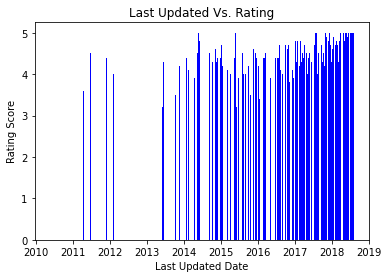

In [ ]:

#Updated date Vs. number of reviews

plt.bar(clean_df["Last Updated"],clean_df["Rating"], color='b',align="center")
plt.title("Last Updated Vs. Rating")
plt.xlabel("Last Updated Date")
plt.ylabel("Rating Score")
plt.show()
plt.savefig('Updated_Date_Vs.Num_of_Reviews.png')
files.download('Updated_Date_Vs.Num_of_Reviews.png')

In [ ]:
#Install counts with number of reviews

<function matplotlib.pyplot.plot>

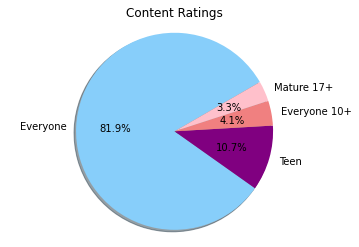

In [ ]:
#Content ratings
content_rating = clean_df[clean_df['Content Rating'] != 'Adults only 18+']
content_rating = content_rating[content_rating['Content Rating'] != 'Unrated']
content_rating['Content Rating'].value_counts()

pie_data = content_rating['Content Rating'].value_counts()
labels = content_rating['Content Rating'].unique()
colors = ["lightskyblue","purple","lightcoral","pink"]
explode = (0,0.1,0.1,0.1,0.1)

plt.pie(pie_data,autopct="%1.1f%%",labels=labels,colors=colors,shadow=True,startangle=30)
plt.axis("equal")
plt.title('Content Ratings')
plt.plot
plt.savefig('Content_Ratings_PieChart.png')
files.download('Content_Ratings_PieChart.png')

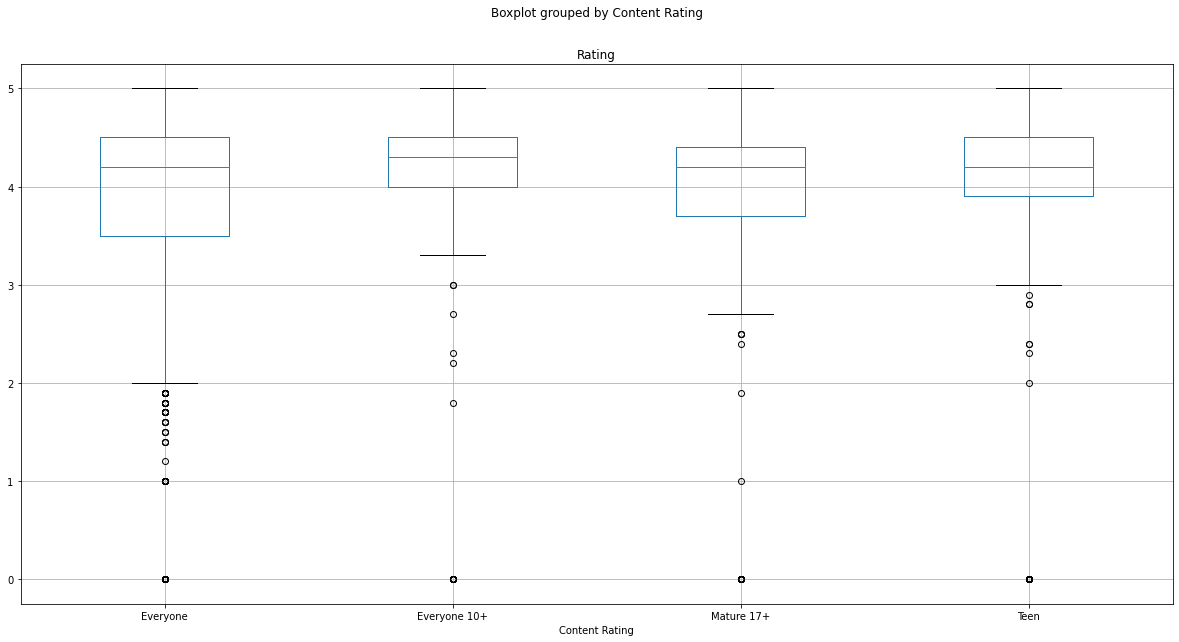

In [ ]:
# Create a boxplot to compare Rating means for each Content Rating
content_rating.boxplot("Rating", by="Content Rating", figsize=(20, 10))
plt.savefig('Ratings_BoxPlot.png')
files.download('Ratings_BoxPlot.png')

In [ ]:
group1 = content_rating[content_rating["Content Rating"] == "Everyone"]["Rating"]
group2 = content_rating[content_rating["Content Rating"] == "Everyone 10+"]["Rating"]
group3 = content_rating[content_rating["Content Rating"] == "Mature 17+"]["Rating"]
group4 = content_rating[content_rating["Content Rating"] == "Teen"]["Rating"]

stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=18.836099820093516, pvalue=3.5433808144993265e-12)